In [32]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [33]:
#LOADING THE DATASET
df = pd.read_csv("amazon_reviews_500.csv")
df.head()

,product_name,review_rating,review_text
0,USB Charger,2,Battery life could be better.
1,Wireless Mouse,1,Battery life could be better.
2,Bluetooth Speaker,3,Highly recommended.
3,Phone Case,5,Highly recommended.
4,Phone Case,5,Not worth the price.


In [34]:
#DISPLAYING TOP 5 ROWS OF THE DATASET AND THE BOTTOM 5 ROWS (HEAD&TAIL)
print("Top 5 Rows of the Dataset:")
display(df.head())
print("Bottom 5 Rows of the Dataset:")
display(df.tail())

Top 5 Rows of the Dataset:


,product_name,review_rating,review_text
0,USB Charger,2,Battery life could be better.
1,Wireless Mouse,1,Battery life could be better.
2,Bluetooth Speaker,3,Highly recommended.
3,Phone Case,5,Highly recommended.
4,Phone Case,5,Not worth the price.


Bottom 5 Rows of the Dataset:


,product_name,review_rating,review_text
495,Fitness Tracker,4,Highly recommended.
496,Fitness Tracker,3,Very satisfied with the purchase.
497,Phone Case,5,Build quality is impressive.
498,Portable SSD,3,Stopped working after a week.
499,Fitness Tracker,1,Very satisfied with the purchase.


In [35]:
#NO.OF ROWS AND COLUMNS IN THE DATASET
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 500
Number of columns: 3


In [36]:
#INDEX
print(df.index)

RangeIndex(start=0, stop=500, step=1)


In [39]:
#COLUMN NAMES
df.columns

Index(['product_name', 'review_rating', 'review_text'], dtype='object')

In [40]:
#DATA TYPES OF EACH COLUMN
df.dtypes

product_name     object
review_rating     int64
review_text      object
dtype: object

In [38]:
#SUMMARY STATISTICS
df.describe()

,review_rating
count,500.000000
mean,3.068000
std,1.392571
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [41]:
#CHECK FOR MISSING VALUES
df.isnull().sum()

product_name     0
review_rating    0
review_text      0
dtype: int64

In [44]:
#UNIQUE PRODUCT NAMES
df['product_name'].unique()

array(['USB Charger', 'Wireless Mouse', 'Bluetooth Speaker', 'Phone Case',
       'Laptop Sleeve', 'Portable SSD', 'Smartwatch',
       'Mechanical Keyboard', 'Fitness Tracker', 'Graphic Tablet'],
      dtype=object)

In [43]:
#NUMBER OF UNIQUE PRODUCTS
df['product_name'].nunique()

10

In [45]:
#MODE OF REVIEW RATINGS
df['review_rating'].mode()

0    4
Name: review_rating, dtype: int64

In [46]:
#CHECK AND REMOVE DUPLICATES
# Count duplicates
print(f"Duplicate rows before cleaning: {df.duplicated().sum()}")
# Remove duplicates
df.drop_duplicates(inplace=True)
# Verify removal
print(f"Duplicate rows after cleaning: {df.duplicated().sum()}")

Duplicate rows before cleaning: 178
Duplicate rows after cleaning: 0


In [47]:
#CHECK AND HANDLE MISSING(NULL) VALUES
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())
# Remove rows with any missing value
df.dropna(inplace=True)

Missing values in each column:
 product_name     0
review_rating    0
review_text      0
dtype: int64


In [48]:
#REMOVE EXTRA WHITESPACES FROM TEXT COLUMN
df['review_text'] = df['review_text'].str.strip()

In [15]:
#FILTER REVIEWS WITH RATING 5
positive_reviews = df[df['review_rating'] == 5]
positive_reviews.head()

,product_name,review_rating,review_text
3,Phone Case,5,Highly recommended.
4,Phone Case,5,Not worth the price.
16,Portable SSD,5,Loved the design and quality.
20,Phone Case,5,Loved the design and quality.
32,Laptop Sleeve,5,Highly recommended.


In [49]:
#FILTER REVIEWS CONTAINING WORD "POOR"
poor_reviews = df[df['review_text'].str.contains('poor', case=False, na=False)]
poor_reviews.head()

,product_name,review_rating,review_text


In [50]:
#FILTER REVIEWS WITH RATING <= 2
low_rated_reviews = df[df['review_rating'] <= 2]
low_rated_reviews.head()

,product_name,review_rating,review_text
0,USB Charger,2,Battery life could be better.
1,Wireless Mouse,1,Battery life could be better.
6,USB Charger,1,Not worth the price.
7,Portable SSD,2,Build quality is impressive.
9,Smartwatch,2,Value for money.


In [51]:
#GROUP BY PRODUCT NAME AND GET COUNT OF REVIEWS
review_count = df.groupby('product_name')['review_rating'].count()
print("Number of Reviews per Product:\n")
print(review_count)

Number of Reviews per Product:

product_name
Bluetooth Speaker      37
Fitness Tracker        26
Graphic Tablet         30
Laptop Sleeve          36
Mechanical Keyboard    28
Phone Case             37
Portable SSD           35
Smartwatch             28
USB Charger            40
Wireless Mouse         25
Name: review_rating, dtype: int64


In [52]:
#GROUP BY PRODUCT NAME AND GET AVERAGE RATING
average_rating = df.groupby('product_name')['review_rating'].mean()
print("Average Rating per Product:\n")
print(average_rating)

Average Rating per Product:

product_name
Bluetooth Speaker      3.000000
Fitness Tracker        3.038462
Graphic Tablet         2.900000
Laptop Sleeve          3.000000
Mechanical Keyboard    3.178571
Phone Case             3.135135
Portable SSD           2.971429
Smartwatch             2.928571
USB Charger            3.000000
Wireless Mouse         3.200000
Name: review_rating, dtype: float64


In [53]:
#SORT PRODUCTS BY HIGHEST AVERAGE RATING
sorted_avg_rating = df.groupby('product_name')['review_rating'].mean().sort_values(ascending=False)
print("Products Sorted by Highest Average Rating:\n")
print(sorted_avg_rating)

Products Sorted by Highest Average Rating:

product_name
Wireless Mouse         3.200000
Mechanical Keyboard    3.178571
Phone Case             3.135135
Fitness Tracker        3.038462
Bluetooth Speaker      3.000000
Laptop Sleeve          3.000000
USB Charger            3.000000
Portable SSD           2.971429
Smartwatch             2.928571
Graphic Tablet         2.900000
Name: review_rating, dtype: float64


In [54]:
#SORT ALL REVIEWS BY RATING(DESCENDING)
sorted_reviews = df.sort_values(by='review_rating',ascending=False)
print("All Reviews Sorted by Rating (Descending):\n")
print(sorted_reviews.head())

All Reviews Sorted by Rating (Descending):

            product_name  review_rating                     review_text
185      Fitness Tracker              5   Stopped working after a week.
325          USB Charger              5   Stopped working after a week.
217           Phone Case              5   Stopped working after a week.
432  Mechanical Keyboard              5   Loved the design and quality.
208           Phone Case              5  Fits perfectly and looks good.


In [22]:
#### MIN RATING
min_rating = df['review_rating'].min()
print(f"Minimum rating: {min_rating}")

Minimum rating: 1


In [23]:
#### MAX RATING
max_rating = df['review_rating'].max()
print(f"Maximum rating: {max_rating}")

Maximum rating: 5


In [24]:
#### MEAN RATING(AVERAGE)
mean_rating = df['review_rating'].mean()
print(f"Mean rating: {mean_rating:.2f}")

Mean rating: 3.03


In [25]:
#### MODE(MOST FREQUENT RATING)
mode_rating = df['review_rating'].mode()[0]
print(f"Mode rating: {mode_rating}")

Mode rating: 4


In [26]:
#### VARIANCE OF RATINGS
variance_rating = df['review_rating'].var()
print(f"Variance in rating: {variance_rating:.2f}")

Variance in rating: 1.99


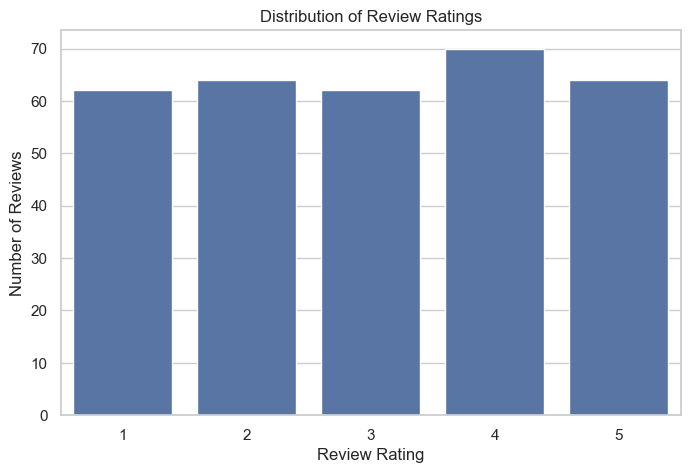

In [55]:
#COUNT PLOT - REVIEW RATING DISTRIBUTION
plt.figure(figsize=(8, 5))
sns.countplot(x='review_rating', data=df)
plt.title("Distribution of Review Ratings")
plt.xlabel("Review Rating")
plt.ylabel("Number of Reviews")
plt.show()
#shows count of each rating(1 to 5)

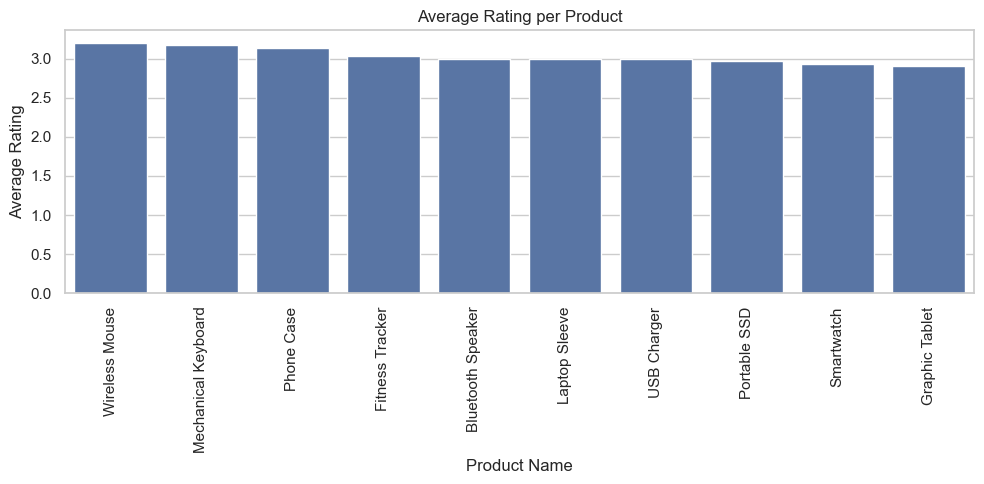

In [56]:
#BAR PLOT - AVERAGE RATING OF PRODUCT(5-STAR VS 1-STAR COUNT)
avg_rating = df.groupby('product_name')['review_rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating.index, y=avg_rating.values)
plt.xticks(rotation=90)
plt.title("Average Rating per Product")
plt.xlabel("Product Name")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

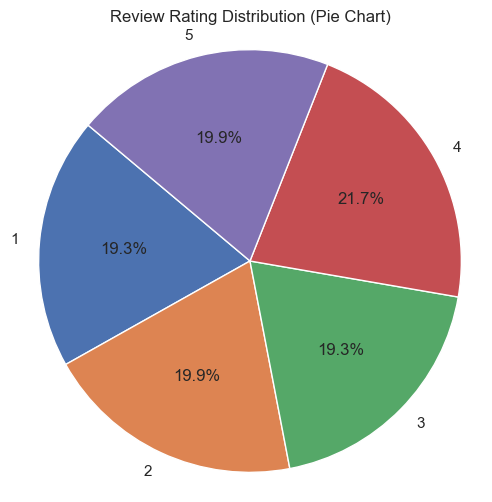

In [57]:
#PIE CHART - REVIEW RATING DISTRIBUTION
rating_counts = df['review_rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Review Rating Distribution (Pie Chart)")
plt.axis('equal') # Equal aspect ratio ensures the pie is circular
plt.show()

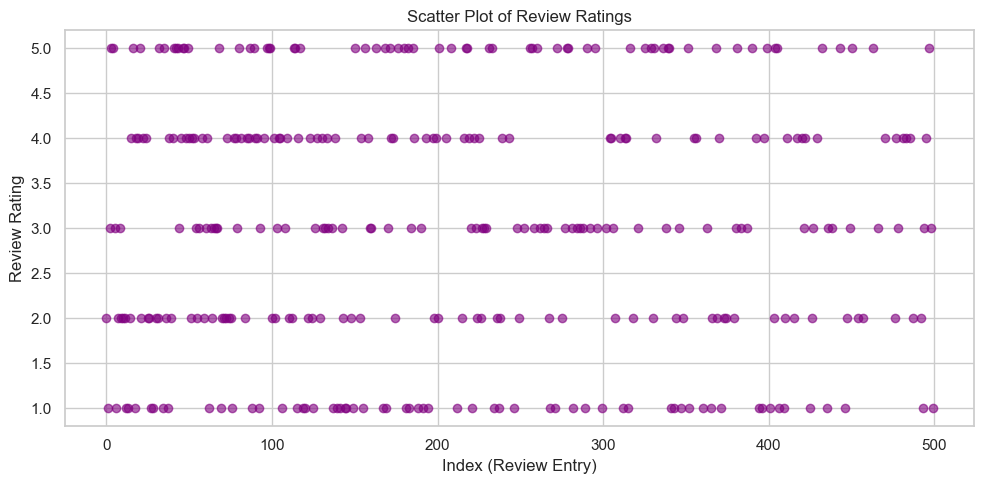

In [58]:
#SCATTER PLOT - REVIEW RATING VS PRODUCT INDEX
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['review_rating'], alpha=0.6, color='purple')
plt.title('Scatter Plot of Review Ratings')
plt.xlabel('Index (Review Entry)')
plt.ylabel('Review Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

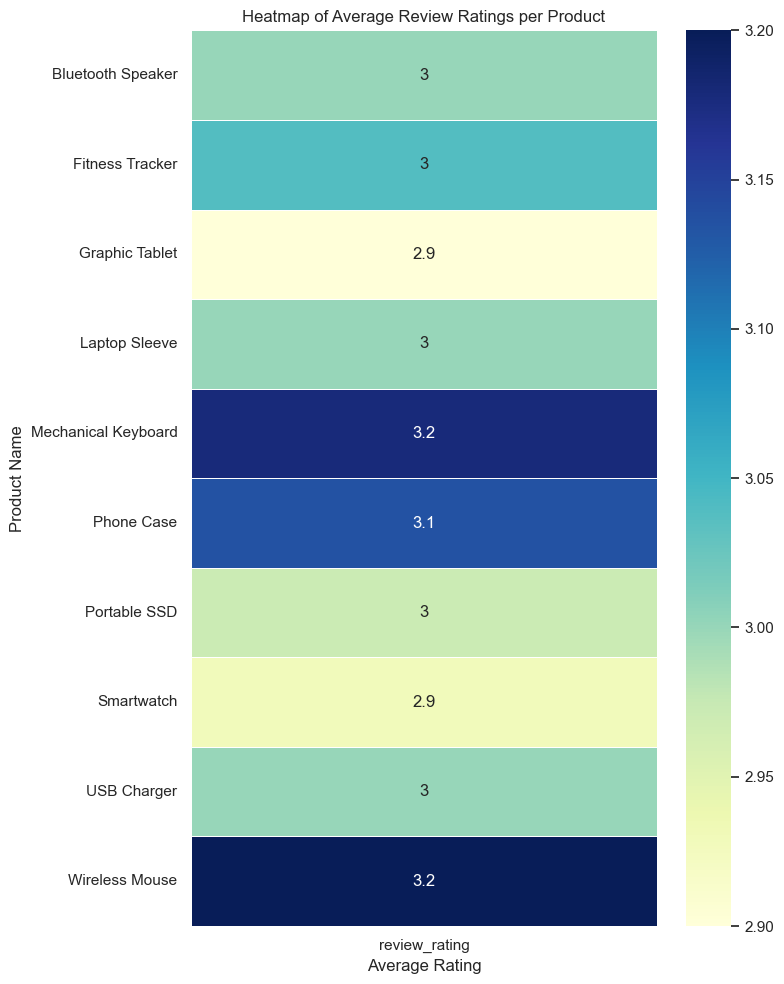

In [59]:
#HEAT MAP - AVERAGE RATING PER PRODUCT
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
###Creating a pivot table with average review ratings
pivot_table = df.pivot_table(values='review_rating', index='product_name', aggfunc='mean')
###Creating the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=0.5)
###Customizing the plot
plt.title('Heatmap of Average Review Ratings per Product')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.tight_layout()
###Show the plot
plt.show()